# Homicide by Country

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')

# Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\farhan ali\Downloads\homicide_by_countries.csv")
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [107]:
df.shape

(195, 6)

# The dataset have 195 columns and 6 rows. It contains Location, Region, Subregion, Rate, Count and Year

In [108]:
df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [109]:
df.tail(5)

,Location,Region,Subregion,Rate,Count,Year
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015
194,Zimbabwe,Africa,Eastern Africa,7.5,981,2012


In [110]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

# This dataset dosen't contain any values but incase if it has any values then drop the null values because it can create error in visualization

In [111]:
#To drop null values
df.dropna(subset =['Rate'],inplace = True)

In [112]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

# Change the datatype of Rate from float to integer

In [113]:
#To change the datatype of specific column 
df['Rate'] = df['Rate'].astype(int)

In [114]:
#To change the datatype of multiple column
my_list = ['Rate','Count','Year']
for i in my_list:
    print(i)
    df[i] =df[i].astype(int)

Rate
Count
Year


# Replace 'Americas' as 'N/S Ameriaca'

In [115]:
df['Region'].replace('Americas','N/S America' , inplace = True)

In [116]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S America,Central America,28,36579,2020
4,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [117]:
df1 = df[['Location','Count']].sort_values(by ='Count',ascending =False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


Text(0.5, 1.0, 'Location coverage')

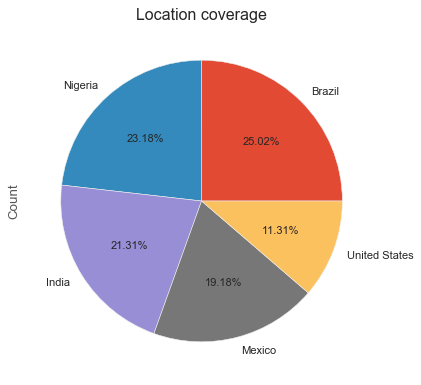

In [192]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct ='%1.2f%%', )
plt.legend().set_visible(False)
plt.title('Location coverage')

In [198]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

SyntaxError: unmatched ')' (925818544.py, line 1)

Text(0.5, 1.0, 'Count of Region')

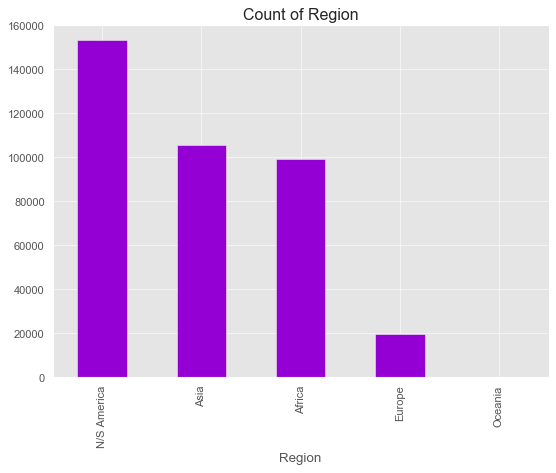

In [200]:
df2.plot(x = 'Region', y ='Count', kind = 'bar', color ='darkviolet')
plt.title('Count of Region')

In [124]:
df3 = df.groupby('Subregion')['Count'].sum()
df3


Subregion
Australia, New Zealand      347
Caribbean                  5037
Central America           47371
Central Asia               1406
Eastern Africa            23669
Eastern Asia               8563
Eastern Europe            14604
Middle Africa              2477
Northern Africa            5538
Northern America          22317
Northern Europe            2097
South America             78872
South-Eastern Asia        25314
Southern Africa           21479
Southern Asia             58631
Southern Europe            1093
Western Africa            46318
Western Asia              11638
Western Europe             2075
Name: Count, dtype: int32

In [125]:
df3.index

Index(['Australia, New Zealand', 'Caribbean', 'Central America',
       'Central Asia', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe',
       'Middle Africa', 'Northern Africa', 'Northern America',
       'Northern Europe', 'South America', 'South-Eastern Asia',
       'Southern Africa', 'Southern Asia', 'Southern Europe', 'Western Africa',
       'Western Asia', 'Western Europe'],
      dtype='object', name='Subregion')

In [126]:
df.values

array([['Afghanistan', 'Asia', 'Southern Asia', 6, 2474, 2018],
       ['Albania', 'Europe', 'Southern Europe', 2, 61, 2020],
       ['Algeria', 'Africa', 'Northern Africa', 1, 580, 2020],
       ...,
       ['Yemen', 'Asia', 'Western Asia', 6, 1703, 2013],
       ['Zambia', 'Africa', 'Eastern Africa', 5, 853, 2015],
       ['Zimbabwe', 'Africa', 'Eastern Africa', 7, 981, 2012]],
      dtype=object)

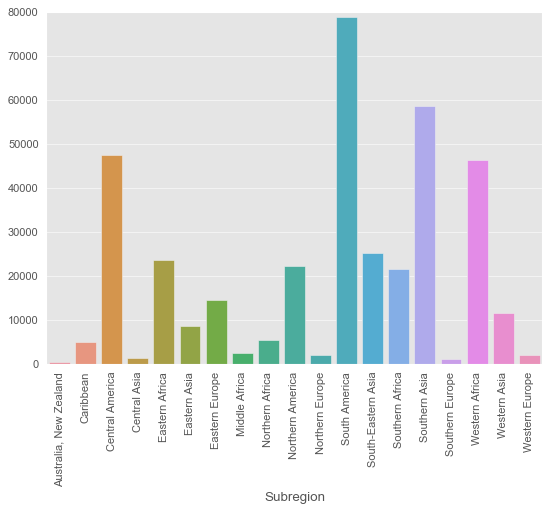

In [202]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel= None

In [128]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [129]:
df.Year.value_counts()

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: Year, dtype: int64

In [130]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [131]:
df4 = df[(df['Region'] =='Asia' ) | (df['Region'] =='Europe')]


In [132]:
df4 = df4[df4['Year'] > 2016][['Region', 'Year','Count']]

In [133]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [134]:
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [135]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

In [136]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


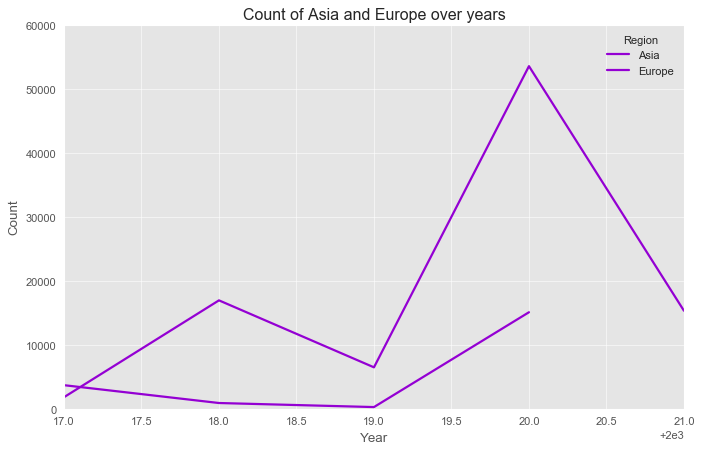

In [203]:
df_unstacked.plot(kind = 'line',figsize =(10,6), color ='darkviolet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')
plt.show()

In [139]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [145]:
dfs = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
dfs

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

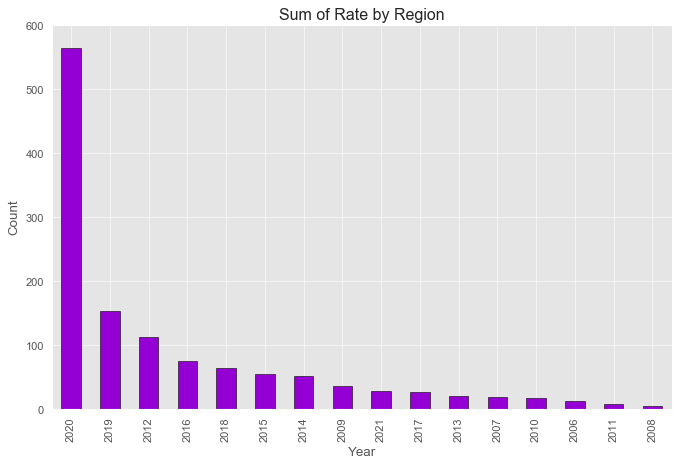

In [204]:
dfs.plot(kind = 'bar', figsize = (10,6), color ='darkviolet', edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sum of Rate by Region')
plt.show()

In [154]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [162]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by= 'Year', ascending = False).head(40)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

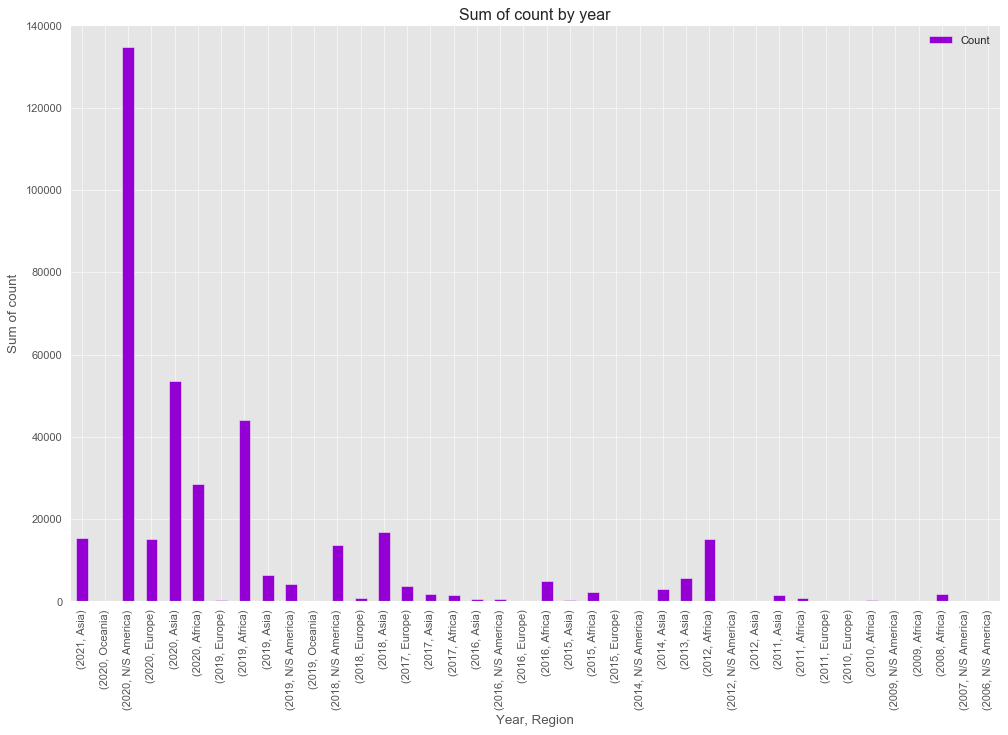

In [205]:
df6.plot(kind = 'bar', figsize=(15,9), color ='darkviolet')
plt.xlabel('Year, Region')
plt.ylabel('Sum of count')
plt.title('Sum of count by year')
plt.show()

In [169]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [173]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [174]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [181]:
data ={
   'Category': df7.index,
    'Values': df7.values,
    'Info' : df7.values
}
df = pd.DataFrame(data)
df

,Category,Values,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [189]:
fig = px.treemap(df, path = ['Category'], values = 'Values', title = 'Treemap')
fig.show()